In [2]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

def f(x):
    return 3*x**2-4*x

def numerical_lim(f,x,h):
    return (f(x+h)-f(x))/h

h=0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f,1,h):.5f}')
    h*=0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


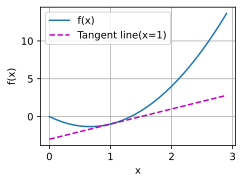

In [3]:
def use_svg_display():
    backend_inline.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5,2.5)):
    use_svg_display()
    d2l.plt.rcParams['figure.figsize']=figsize

def set_axes(axes,xlabel,ylabel,xlim,ylim,xscale,yscale,legend):
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

def plot(X,Y=None,xlabel=None,ylabel=None,legend=None,xlim=None,ylim=None,xscale='linear',yscale='linear',fmts=('-','m--','g-.','r:'),figsize=(3.5,2.5),axes=None):
    if legend is None:
        legend=[]
    set_figsize(figsize)
    axes=axes if axes else d2l.plt.gca()
    
    def has_one_axis(X):
        return (hasattr(X,'ndim') and X.ndim==1 or isinstance(X,list) and not hasattr(X[0],'__len__'))
    
    if has_one_axis(X):
        X=[X]
    if Y is None:
        X,Y=[[]]*len(X),X
    elif has_one_axis(Y):
        Y=[Y]
    if len(X)!=len(Y):
        X=X*len(Y)
    axes.cla()
    for x,y,fmt in zip(X,Y,fmts):
        if len(x):
            axes.plot(x,y,fmt)
        else:
            axes.plot(y,fmt)
    set_axes(axes,xlabel,ylabel,xlim,ylim,xscale,yscale,legend)

x=np.arange(0,3,0.1)
plot(x,[f(x),2*x-3],'x','f(x)',legend=['f(x)','Tangent line(x=1)'])

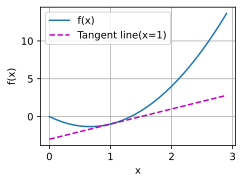

In [4]:
d2l.plot(x,[f(x),2*x-3],'x','f(x)',legend=['f(x)','Tangent line(x=1)'])

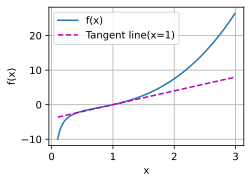

In [5]:
x=np.arange(0.1,3,0.01)
d2l.plot(x,[x**3-1.0/x,4*x-4],'x','f(x)',legend=['f(x)','Tangent line(x=1)'])

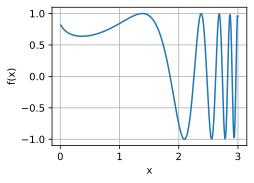

In [6]:
import torch
torch.pi=torch.acos(torch.zeros(1)).item()*2
x_big=torch.arange(0.01,3.01,0.01)
ys=torch.sin(x_big**x_big)
d2l.plot(x_big,ys,'x','f(x)')

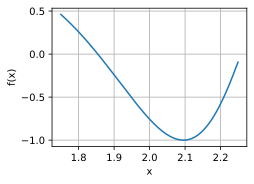

In [7]:
x_med = torch.arange(1.75, 2.25, 0.001)
ys = torch.sin(x_med**x_med)
d2l.plot(x_med, ys, 'x', 'f(x)')

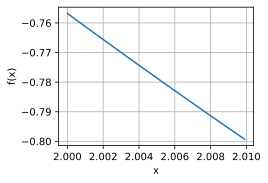

In [8]:
x_small = torch.arange(2.0, 2.01, 0.0001)
ys = torch.sin(x_small**x_small)
d2l.plot(x_small, ys, 'x', 'f(x)')

In [9]:
# Define our function
def L(x):
    return x**2 + 1701*(x-4)**3

# Print the difference divided by epsilon for several epsilon
for epsilon in [0.1, 0.001, 0.0001, 0.00001]:
    print(f'epsilon = {epsilon:.5f} -> {(L(4+epsilon) - L(4)) / epsilon:.5f}')

epsilon = 0.10000 -> 25.11000
epsilon = 0.00100 -> 8.00270
epsilon = 0.00010 -> 8.00012
epsilon = 0.00001 -> 8.00001


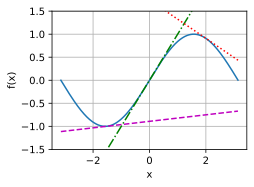

In [10]:
# Compute sin
xs = torch.arange(-torch.pi, torch.pi, 0.01)
plots = [torch.sin(xs)]

# Compute some linear approximations. Use d(sin(x))/dx = cos(x)
for x0 in [-1.5, 0.0, 2.0]:
    plots.append(torch.sin(torch.tensor(x0)) + (xs - x0) *
                 torch.cos(torch.tensor(x0)))

d2l.plot(xs, plots, 'x', 'f(x)', ylim=[-1.5, 1.5])

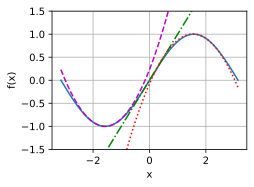

In [11]:
# Compute sin
xs = torch.arange(-torch.pi, torch.pi, 0.01)
plots = [torch.sin(xs)]

# Compute some quadratic approximations. Use d(sin(x)) / dx = cos(x)
for x0 in [-1.5, 0.0, 2.0]:
    plots.append(torch.sin(torch.tensor(x0)) + (xs - x0) *
                 torch.cos(torch.tensor(x0)) - (xs - x0)**2 *
                 torch.sin(torch.tensor(x0)) / 2)

d2l.plot(xs, plots, 'x', 'f(x)', ylim=[-1.5, 1.5])

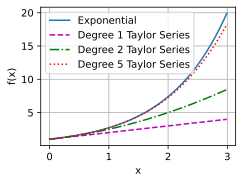

In [12]:
# Compute the exponential function
xs = torch.arange(0, 3, 0.01)
ys = torch.exp(xs)

# Compute a few Taylor series approximations
P1 = 1 + xs
P2 = 1 + xs + xs**2 / 2
P5 = 1 + xs + xs**2 / 2 + xs**3 / 6 + xs**4 / 24 + xs**5 / 120

d2l.plot(xs, [ys, P1, P2, P5], 'x', 'f(x)', legend=[
    "Exponential", "Degree 1 Taylor Series", "Degree 2 Taylor Series",
    "Degree 5 Taylor Series"])

In [13]:
a=torch.arange(4,dtype=torch.float32)
b = torch.ones(4, dtype = torch.float32)
torch.dot(a, b),a.dot(b)


(tensor(6.), tensor(6.))

In [14]:
def f(x, y):
    return torch.log(torch.exp(x) + torch.exp(y))
def grad_f(x, y):
    return torch.tensor([torch.exp(x) / (torch.exp(x) + torch.exp(y)),
                     torch.exp(y) / (torch.exp(x) + torch.exp(y))])

epsilon = torch.tensor([0.01, -0.03])
grad_approx = f(torch.tensor([0.]), torch.log(
    torch.tensor([2.]))) + epsilon.dot(
    grad_f(torch.tensor([0.]), torch.log(torch.tensor(2.))))
true_value = f(torch.tensor([0.]) + epsilon[0], torch.log(
    torch.tensor([2.])) + epsilon[1])
f'approximation: {grad_approx}, true Value: {true_value}'

'approximation: tensor([1.0819]), true Value: tensor([1.0821])'

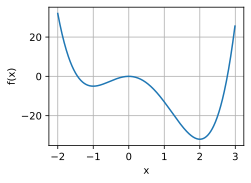

In [15]:
x = torch.arange(-2, 3, 0.01)
f = (3 * x**4) - (4 * x**3) - (12 * x**2)

d2l.plot(x, f, 'x', 'f(x)')

In [16]:
# Compute the value of the function from inputs to outputs
w, x, y, z = -1, 0, -2, 1
a, b = (w + x + y + z)**2, (w + x - y - z)**2
u, v = (a + b)**2, (a - b)**2
f = (u + v)**2
print(f'    f at {w}, {x}, {y}, {z} is {f}')

# Compute the single step partials
df_du, df_dv = 2*(u + v), 2*(u + v)
du_da, du_db, dv_da, dv_db = 2*(a + b), 2*(a + b), 2*(a - b), -2*(a - b)
da_dw, db_dw = 2*(w + x + y + z), 2*(w + x - y - z)

# Compute the final result from inputs to outputs
du_dw, dv_dw = du_da*da_dw + du_db*db_dw, dv_da*da_dw + dv_db*db_dw
df_dw = df_du*du_dw + df_dv*dv_dw
print(f'df/dw at {w}, {x}, {y}, {z} is {df_dw}')

    f at -1, 0, -2, 1 is 1024
df/dw at -1, 0, -2, 1 is -4096


In [17]:
# Compute the value of the function from inputs to outputs
w, x, y, z = -1, 0, -2, 1
a, b = (w + x + y + z)**2, (w + x - y - z)**2
u, v = (a + b)**2, (a - b)**2
f = (u + v)**2
print(f'f at {w}, {x}, {y}, {z} is {f}')

# Compute the derivative using the decomposition above
# First compute the single step partials
df_du, df_dv = 2*(u + v), 2*(u + v)
du_da, du_db, dv_da, dv_db = 2*(a + b), 2*(a + b), 2*(a - b), -2*(a - b)
da_dw, db_dw = 2*(w + x + y + z), 2*(w + x - y - z)
da_dx, db_dx = 2*(w + x + y + z), 2*(w + x - y - z)
da_dy, db_dy = 2*(w + x + y + z), -2*(w + x - y - z)
da_dz, db_dz = 2*(w + x + y + z), -2*(w + x - y - z)

# Now compute how f changes when we change any value from output to input
df_da, df_db = df_du*du_da + df_dv*dv_da, df_du*du_db + df_dv*dv_db
df_dw, df_dx = df_da*da_dw + df_db*db_dw, df_da*da_dx + df_db*db_dx
df_dy, df_dz = df_da*da_dy + df_db*db_dy, df_da*da_dz + df_db*db_dz

print(f'df/dw at {w}, {x}, {y}, {z} is {df_dw}')
print(f'df/dx at {w}, {x}, {y}, {z} is {df_dx}')
print(f'df/dy at {w}, {x}, {y}, {z} is {df_dy}')
print(f'df/dz at {w}, {x}, {y}, {z} is {df_dz}')

f at -1, 0, -2, 1 is 1024
df/dw at -1, 0, -2, 1 is -4096
df/dx at -1, 0, -2, 1 is -4096
df/dy at -1, 0, -2, 1 is -4096
df/dz at -1, 0, -2, 1 is -4096


In [18]:
# Initialize as ndarrays, then attach gradients
w = torch.tensor([-1.], requires_grad=True)
x = torch.tensor([0.], requires_grad=True)
y = torch.tensor([-2.], requires_grad=True)
z = torch.tensor([1.], requires_grad=True)
# Do the computation like usual, tracking gradients
a, b = (w + x + y + z)**2, (w + x - y - z)**2
u, v = (a + b)**2, (a - b)**2
f = (u + v)**2

# Execute backward pass
f.backward()

print(f'df/dw at {w.data.item()}, {x.data.item()}, {y.data.item()}, '
      f'{z.data.item()} is {w.grad.data.item()}')
print(f'df/dx at {w.data.item()}, {x.data.item()}, {y.data.item()}, '
      f'{z.data.item()} is {x.grad.data.item()}')
print(f'df/dy at {w.data.item()}, {x.data.item()}, {y.data.item()}, '
      f'{z.data.item()} is {y.grad.data.item()}')
print(f'df/dz at {w.data.item()}, {x.data.item()}, {y.data.item()}, '
      f'{z.data.item()} is {z.grad.data.item()}')

df/dw at -1.0, 0.0, -2.0, 1.0 is -4096.0
df/dx at -1.0, 0.0, -2.0, 1.0 is -4096.0
df/dy at -1.0, 0.0, -2.0, 1.0 is -4096.0
df/dz at -1.0, 0.0, -2.0, 1.0 is -4096.0


In [24]:
x, y = torch.meshgrid(torch.linspace(0,4,5),torch.linspace(0,4,5))
x,y

(tensor([[0., 0., 0., 0., 0.],
         [1., 1., 1., 1., 1.],
         [2., 2., 2., 2., 2.],
         [3., 3., 3., 3., 3.],
         [4., 4., 4., 4., 4.]]),
 tensor([[0., 1., 2., 3., 4.],
         [0., 1., 2., 3., 4.],
         [0., 1., 2., 3., 4.],
         [0., 1., 2., 3., 4.],
         [0., 1., 2., 3., 4.]]))

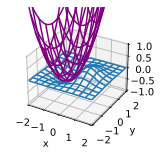

In [30]:
# Construct grid and compute function
x, y = torch.meshgrid(torch.linspace(-2, 2, 101),
                   torch.linspace(-2, 2, 101))

z = x*torch.exp(- x**2 - y**2)

# Compute approximating quadratic with gradient and Hessian at (1, 0)
w = torch.exp(torch.tensor([-1.]))*(-1 - (x + 1) + 2 * (x + 1)**2 + 2 * y**2)

# Plot function
ax = d2l.plt.figure().add_subplot(111, projection='3d')
ax.plot_wireframe(x.numpy(), y.numpy(), z.numpy(),
                  **{'rstride': 10, 'cstride': 10})
ax.plot_wireframe(x.numpy(), y.numpy(), w.numpy(),
                  **{'rstride': 10, 'cstride': 10}, color='purple')
d2l.plt.xlabel('x')
d2l.plt.ylabel('y')
d2l.set_figsize()
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-1, 1)
ax.dist = 12

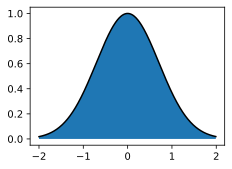

In [31]:
x = torch.arange(-2, 2, 0.01)
f = torch.exp(-x**2)

d2l.set_figsize()
d2l.plt.plot(x, f, color='black')
d2l.plt.fill_between(x.tolist(), f.tolist())
d2l.plt.show()

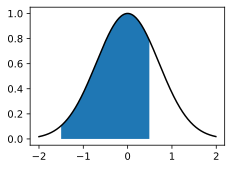

In [33]:
d2l.plt.plot(x, f, color='black')
d2l.plt.fill_between(x.tolist()[50:250], f.tolist()[50:250])
d2l.plt.show()

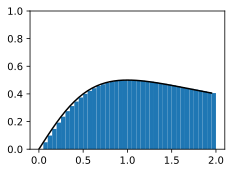

'approximation: 0.7944855690002441, truth: tensor([0.8047])'

In [34]:
epsilon = 0.05
a = 0
b = 2

x = torch.arange(a, b, epsilon)
f = x / (1 + x**2)

approx = torch.sum(epsilon*f)
true = torch.log(torch.tensor([5.])) / 2

d2l.set_figsize()
d2l.plt.bar(x, f, width=epsilon, align='edge')
d2l.plt.plot(x, f, color='black')
d2l.plt.ylim([0, 1])
d2l.plt.show()

f'approximation: {approx}, truth: {true}'

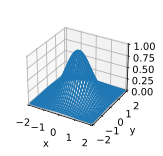

In [35]:
# Construct grid and compute function
x, y = torch.meshgrid(torch.linspace(-2, 2, 101), torch.linspace(-2, 2, 101))
z = torch.exp(- x**2 - y**2)

# Plot function
ax = d2l.plt.figure().add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z)
d2l.plt.xlabel('x')
d2l.plt.ylabel('y')
d2l.plt.xticks([-2, -1, 0, 1, 2])
d2l.plt.yticks([-2, -1, 0, 1, 2])
d2l.set_figsize()
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(0, 1)
ax.dist = 12